### Linear Discriminant Analysis (LDA) ### 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg as lg
from sklearn.preprocessing import LabelEncoder
#Creating a dataset 
A= np.array(np.linspace(-100,100,1000))
X=np.array([[a , 3*a-5+3*np.random.randn()] for a in A])

#define the seoperation of 0.5 between two classes/Features
delta=0.5
feature_names=['Feature 1','Feature 2']
classes=['Y1','Y2']
Y1=X[X[:,1]>3*X[:,0]-5+delta]      #Feature_1
Y2=X[X[:,1]<3*X[:,0]-5-delta]      #Feature_2

#concatenate the two features in a single matrix and convert it into a dataframe format and display it
inputmat=np.concatenate((Y1,Y2),axis=0)
data= pd.DataFrame(inputmat, columns=feature_names)

#class name are repeated for understanding the dataset
C1=np.repeat(0,(len(Y1)))
C2=np.repeat(1,(len(Y2)))
target=np.concatenate((C1,C2),axis=0)
C1_name=np.repeat('Y1',(len(Y1)))
C2_name=np.repeat('Y2',(len(Y1)))
target_names=['Y1','Y2']
data_class = pd.Categorical.from_codes(target, target_names)
df = data.join(pd.Series(data_class, name='class'))
print(df)

      Feature 1   Feature 2 class
0    -99.199199 -297.758481    Y1
1    -98.998999 -297.404233    Y1
2    -98.798799 -296.917349    Y1
3    -98.598599 -299.118592    Y1
4    -98.198198 -293.093312    Y1
..          ...         ...   ...
875   98.398398  289.128611    Y2
876   98.598599  289.503369    Y2
877   98.798799  284.732661    Y2
878   98.998999  288.850740    Y2
879  100.000000  293.988903    Y2

[880 rows x 3 columns]


In [2]:
Y1.shape

(427, 2)

In [3]:
Y2 = np.resize(414,2)

In [4]:
Y2.shape

(2,)

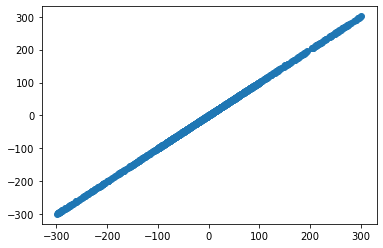

In [5]:
plt.scatter(Y1,Y1)

In [6]:
class_feature_means = pd.DataFrame(columns=target_names)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
class_feature_means

,Y1,Y2
Feature 1,-3.797474,4.598196
Feature 2,-13.562227,6.071822


In [7]:
within_class_scatter_matrix = np.zeros((2,2))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    s = np.zeros((2,2))
    for index, row in rows.iterrows():
        x, mc = row.values.reshape(2,1), class_feature_means[c].values.reshape(2,1)
        s += (x - mc).dot((x - mc).T)
    within_class_scatter_matrix += s
within_class_scatter_matrix

array([[ 2896631.37047185,  8685660.42799556],
       [ 8685660.42799556, 26047020.51619887]])

In [8]:
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((2,2))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index) 
    mc, m = class_feature_means[c].values.reshape(2,1), feature_means.values.reshape(2,1)
    between_class_scatter_matrix += n*((mc - m).dot((mc - m).T))
between_class_scatter_matrix.shape

(2, 2)

In [9]:
between_class_scatter_matrix

array([[15493.66634037, 36233.36592844],
       [36233.36592844, 84735.06384238]])

In [10]:
eigen_values, eigen_vectors = np.linalg.eig((np.linalg.inv(within_class_scatter_matrix)).dot(between_class_scatter_matrix))

In [11]:
eigen_values

array([ 2.47342105e+00, -1.06581410e-14])

In [12]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

2.47342105255143
1.0658141036401503e-14


In [13]:
w_matrix = np.hstack((pairs[0][1].reshape(2,1), pairs[1][1].reshape(2,1)))
w_matrix.shape

(2, 2)

In [14]:
X_lda = np.array(data.dot(w_matrix))
print(X_lda.shape)

(880, 2)


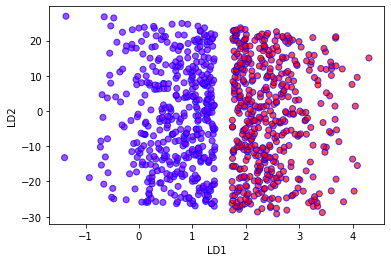

In [15]:
le = LabelEncoder()
y = le.fit_transform(df['class'])
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter( X_lda[:,0], X_lda[:,1], c=y, cmap='rainbow',alpha=0.7,edgecolors='b')

### Principal Component Analysis (PCA) ###

[1.07631909e+00 3.30033335e+04]


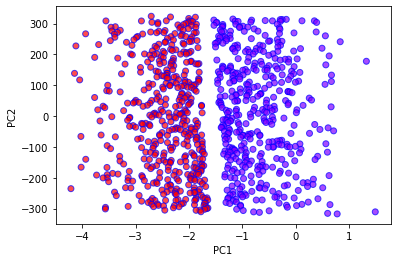

In [16]:
le = LabelEncoder()
y = le.fit_transform(df['class'])
meanmat1=np.mean(data,axis=0)
subs1=data-meanmat1
subs1.shape
covm=np.dot(subs1.T,subs1)
cov1=covm/data.shape[0]
eig1,eigv1=np.linalg.eig(cov1)
result=np.dot(data,eigv1)
eigv1_1=eigv1[:,[0,1]] 
print(eig1)
result1=np.dot(data,eigv1_1)
#plt.scatter(result1[:, 0], result1[:, 1], color=colors)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    result1[:, 0],
    result1[:, 1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

Text(0.5, 1.0, 'Linear Discriminant Analysis')

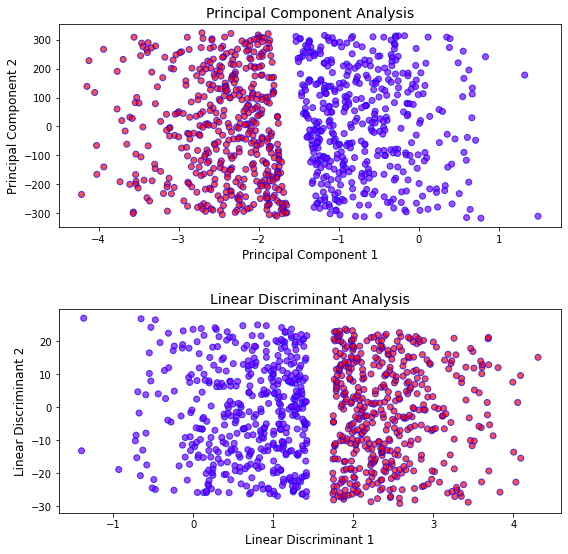

In [17]:
fig, axs = plt.subplots(2,figsize=(9,9),gridspec_kw={'wspace':0.5, 'hspace':0.4})
axs[0].scatter(result1[:,0],
    result1[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
axs[0].set_ylabel('Principal Component 2',size=12)
axs[0].set_xlabel('Principal Component 1',size=12)
axs[0].set_title('Principal Component Analysis',size=14)
axs[1].scatter(X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
axs[1].set_ylabel('Linear Discriminant 2',size=12)
axs[1].set_xlabel('Linear Discriminant 1',size=12)
axs[1].set_title('Linear Discriminant Analysis',size=14)